In [2]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [3]:
dt = 0.005
t = np.arange(0, 25, dt)

# useful for sinusoids
nPeriods = 2
f0 = nPeriods / (np.max(t))

In [4]:
# signal made noisy with random integers, good for visualization and understanding
# of the "averaging" function of the operator
x = np.cos(2*np.pi*t*f0) * np.sin(2*np.pi*t*3*f0) * np.exp(-t/10)

In [5]:
# definition of the number of samples
nSamples = 50

# of course the sampling frequency will be max(t) + dt (e.g. 25 [seconds])
# divided by the number of samples "nSamples"(e.g. 25 => 1 Hz,
# 1 sample per second)

# in order to create the sampling operator, we can use a vector made
# entirely by 1/interval length and 0s, where the interval length is the
# number of samples of the original signal (defined in time t) taken into
# consideration in order to compute the first sample of the sampled signal

# since the number of samples choice is left to the user, we just compute
# the operator matrix by repeating a circular shift of a vector v, that we
# compute keeping in mind that given a certain number of samples,
# each and every one of them takes into account intervalLength samples
# of the ideally continuous signal. That is because:

intervalLength = int(len(t) / nSamples)

# is the number of samples of the original signal that will be associated
# with one sample of the sampled signal (division in nSamples
# non-overlapping intervals).

v = np.concatenate([(1/intervalLength) * np.ones(intervalLength),
                    np.zeros(len(t) - intervalLength)])
print(f"Interval length: {intervalLength}")
print(f"Vector v: {v}")

Interval length: 100
Vector v: [0.01 0.01 0.01 ... 0.   0.   0.  ]


In [6]:
# we build the operator matrix by repeating nSamples time the vector v,
# each time applying a shift of intervalLength samples
A = np.zeros((nSamples, len(t)))
for n in range(nSamples):
    A[n, :] = np.roll(v, n * intervalLength)

print("Matrix A:")
print(A)

# we obtain a matrix that has nSamples rows and length(t) columns
# the matrix product between the op. matrix and the original signal is then
# possible, since we are left with:
# A * x' = y => [nSamples x length(t) * length(t) x 1 = nSamples x 1]
y = A @ x

# the "new time step" (useful only for comparison plots..) can be computed
# as follows:
dn = (np.max(t) + dt) / nSamples

# We used max(t) + dt since we made t stretch from 0 to for instance
# 25 - dt...)

print("Matrix A^*:")
print(A.T)

# the adjoint operator is simply conj(A.') = A' = ctranspose(A);
xr = (A.T @ y) * intervalLength

# we of course must multiply for intervalLength, otherwise each sample of
# the reconstruction would have an amplitude of x(..) * 1/intervalLength
# (by definition of matrix product, rows times columns..)

Matrix A:
[[0.01 0.01 0.01 ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.01 0.01 0.01]]
Matrix A^*:
[[0.01 0.   0.   ... 0.   0.   0.  ]
 [0.01 0.   0.   ... 0.   0.   0.  ]
 [0.01 0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.01]
 [0.   0.   0.   ... 0.   0.   0.01]
 [0.   0.   0.   ... 0.   0.   0.01]]


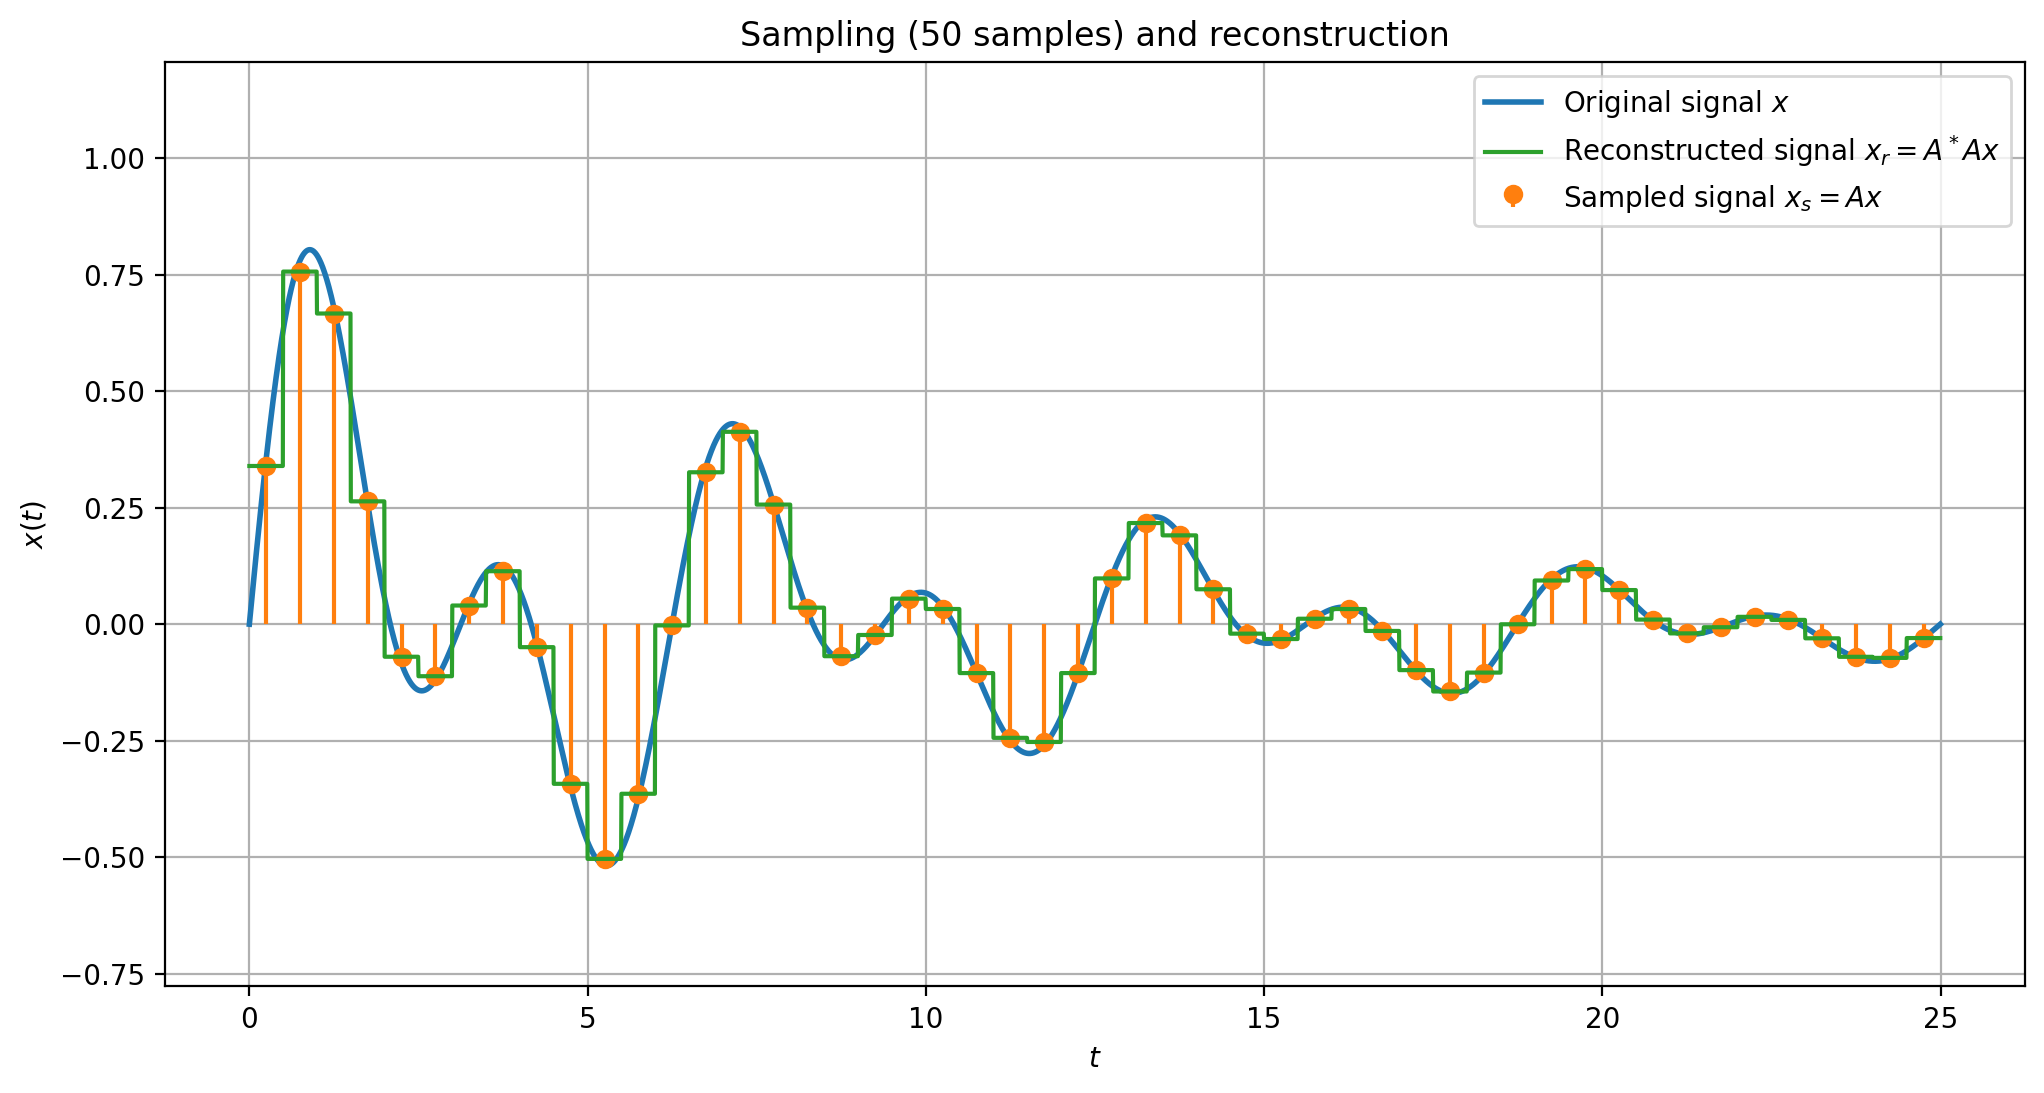

In [7]:
# %% Plot handling

plt.figure(figsize=(12, 6))
plt.plot(t, x, linewidth=2, label='Original signal $x$')
plt.stem(np.arange(dn/2, np.max(t)+dn/2, dn), y, linefmt='C1-', markerfmt='C1o', basefmt=" ", label='Sampled signal $x_s = A x$')
plt.plot(t, xr, linewidth=1.5, label='Reconstructed signal $x_r = A^* A x$')
plt.grid(True)

plt.title(f"Sampling ({nSamples} samples) and reconstruction")
plt.ylim([np.min(x) - abs(np.min(x)/2), np.max(x) + abs(np.max(x)/2)])
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.legend()
plt.show()

In [8]:
#let us verify that the scalar product is preserved with the adjoint operation
# <Ax, y> = <x, A^* y>, if we take y=Ax then ||Ax||^2 = <x, A^* A x>

yl2 = y @ y.T
xl2 = x @ (A.T @ y)

print(f"l2-inner product of <y,y>: {yl2}")
print(f"L2-inner product of <x,xr>: {xl2}")

l2-inner product of <y,y>: 2.420179705786578
L2-inner product of <x,xr>: 2.4201797057865786


In [11]:
(A @ A.T)*intervalLength

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])